In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Diwali_Sales_Data.csv", encoding = 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,Female,26-35,28,Married,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,Female,26-35,35,Not Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,Female,26-35,35,Not Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,Male,0-17,16,Married,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,Male,26-35,28,Not Married,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  object 
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(3), object(9)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status','unnamed1'],axis= 1,inplace = True)

In [7]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
df['Amount'] = df['Amount'].astype(int)

In [12]:
df['Amount'].dtypes

dtype('int32')

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
df.rename(columns={'Cust_name':'Customer_name'},inplace= True)

In [15]:
df.columns

Index(['User_ID', 'Customer_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# EDA On 'GENDER' Column

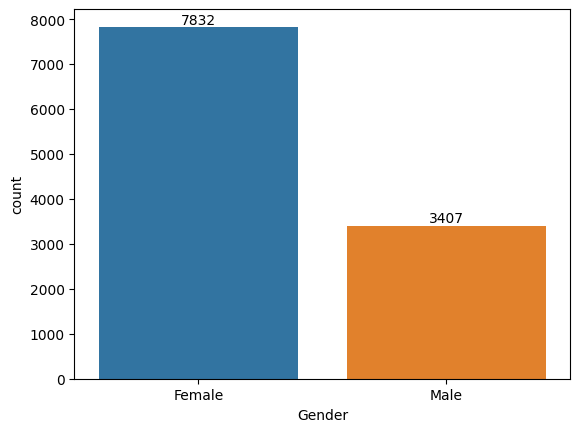

In [16]:
gen = sns.countplot(x= 'Gender' , data = df )

for bars in gen.containers:
    gen.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

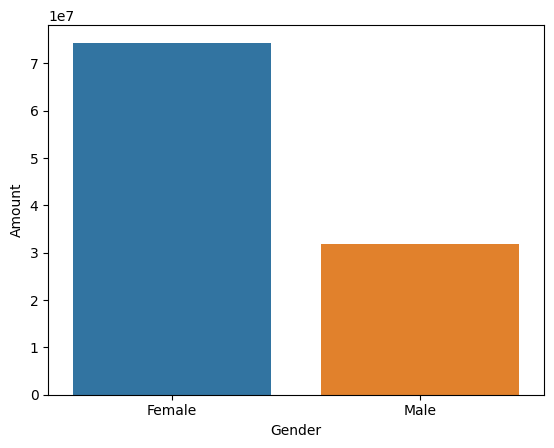

In [17]:
sales_gen = df.groupby(['Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(x='Gender',y='Amount',data = sales_gen)

***From the above graphs we can see that most of the buyers are female and even the purchasing power of women is greater than men.***

# EDA On 'AGE' column

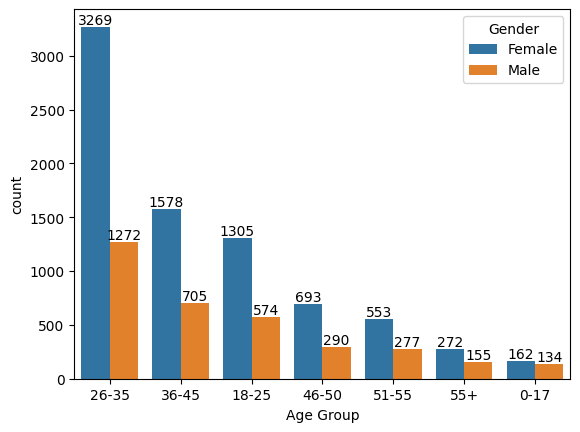

In [18]:
age = sns.countplot(x= 'Age Group',hue= 'Gender', data = df,order = df['Age Group'].value_counts().index)

for bars in age.containers:
    age.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

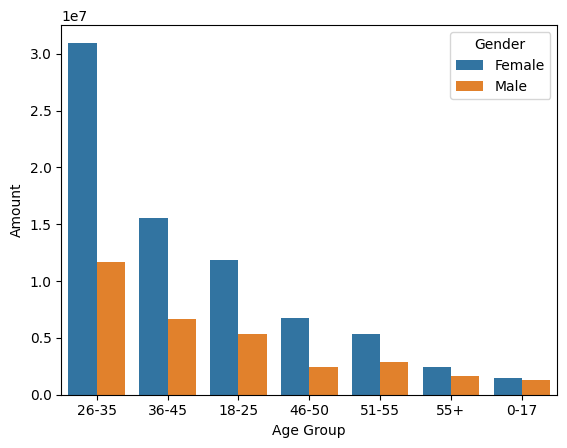

In [19]:
sales_age = df.groupby(['Age Group','Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(x='Age Group',y='Amount',data = sales_age, hue = 'Gender')

***From the above graph we can see that most of the buyers are 26-35 year old females.***

# EDA On 'STATE' column

<Axes: xlabel='State', ylabel='Orders'>

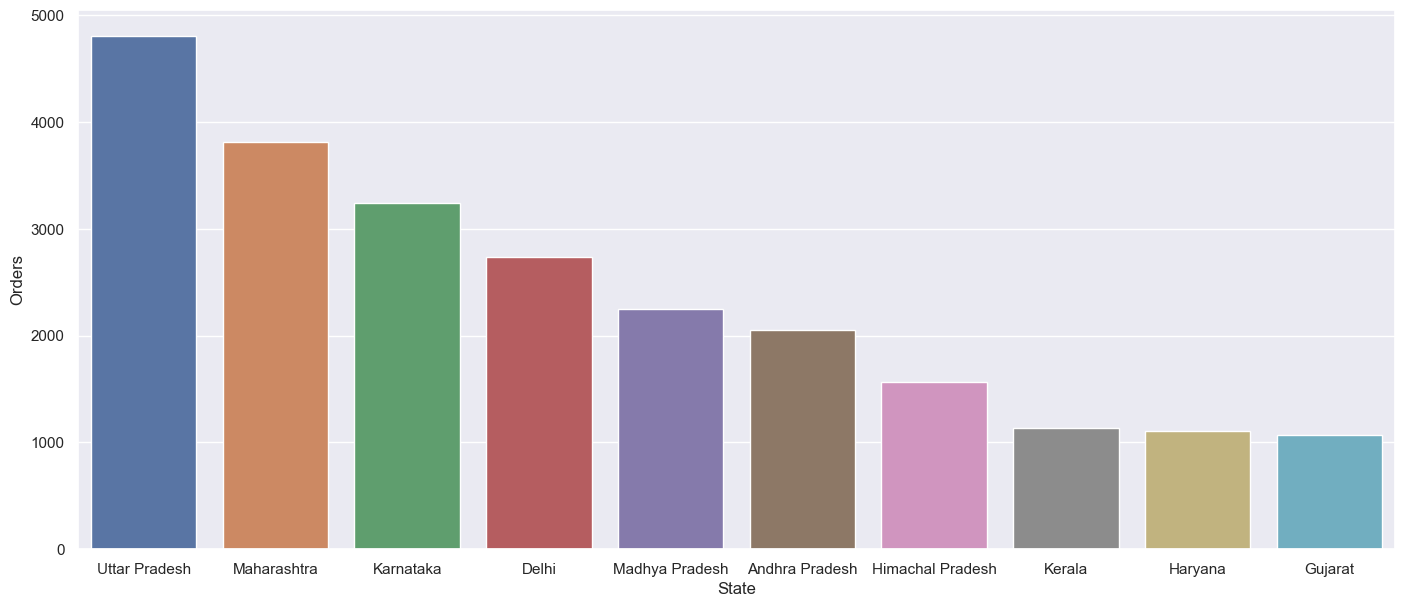

In [20]:
orders_state = df.groupby(['State'], as_index= False)['Orders'].sum().sort_values(by='Orders', ascending = False).head(10)
sns.set(rc={'figure.figsize':(17,7)})
sns.barplot(x='State',y='Orders',data = orders_state)

<Axes: xlabel='State', ylabel='Amount'>

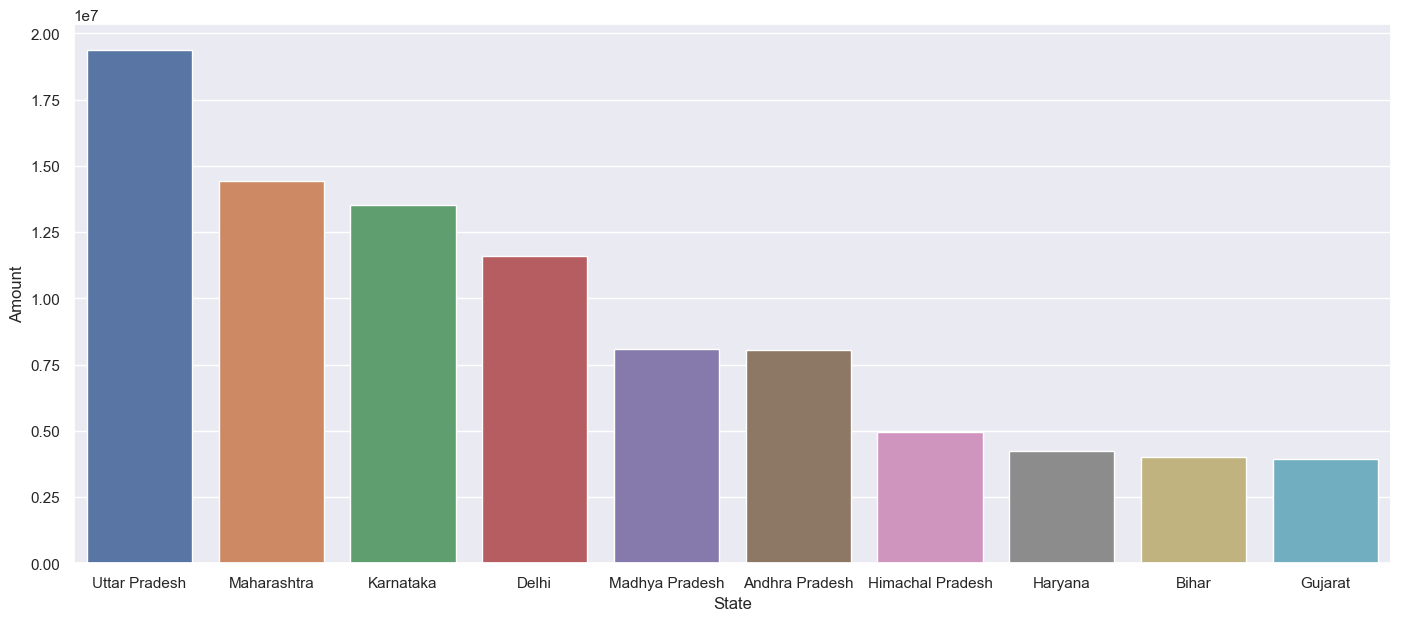

In [21]:
sales_state = df.groupby(['State'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(17,7)})
sns.barplot(x='State',y='Amount',data = sales_state)

***From the above graphs we can see that top 3 states with both most no of the orders and sales are from Uttar Pradesh, Maharashtra and Karnataka respectively.***

# EDA On 'MARITAL STATUS' Column.

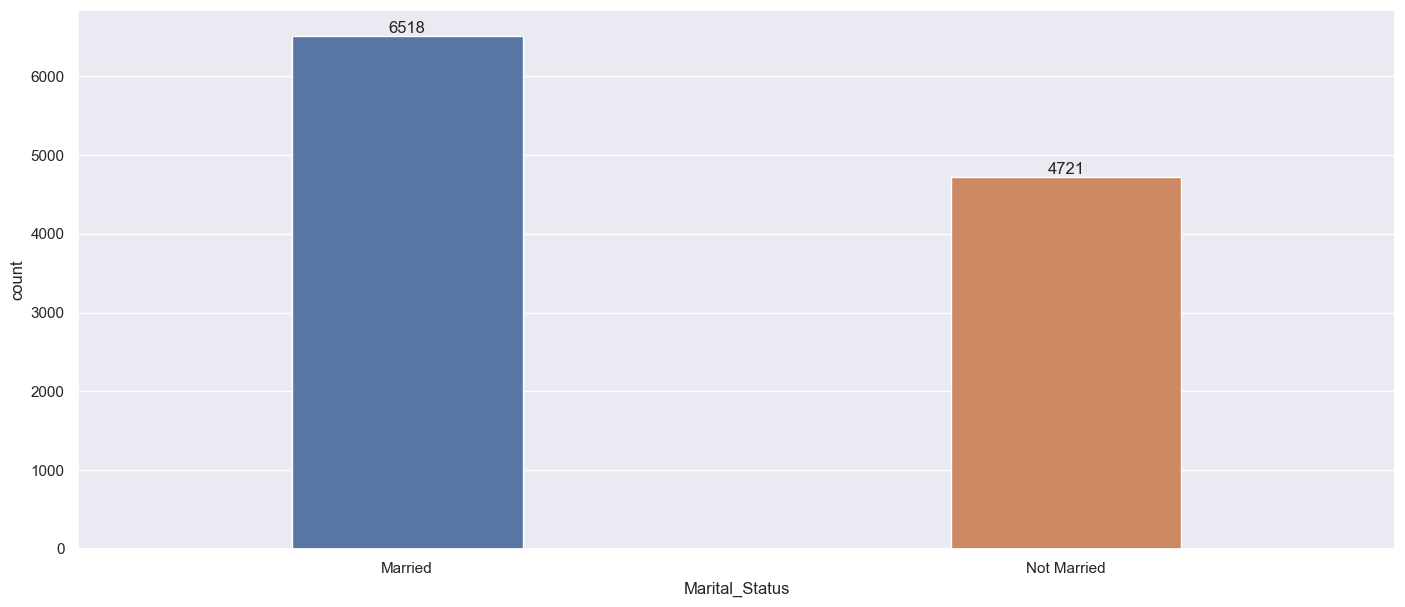

In [22]:
mar = sns.countplot(x= 'Marital_Status',width= 0.35, data = df)

for bars in mar.containers:
    mar.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

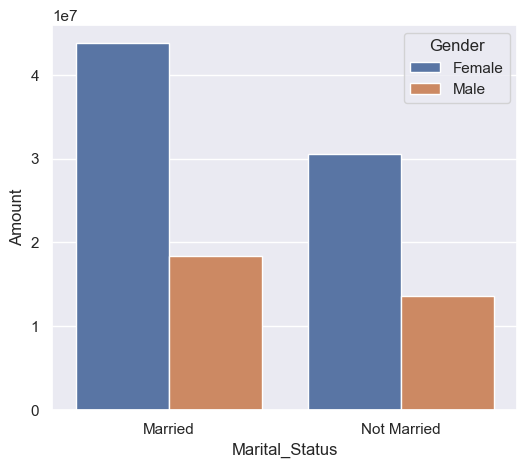

In [23]:
mar_sales = df.groupby(['Marital_Status','Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(x='Marital_Status',y='Amount',data = mar_sales,hue='Gender')

***From the above graphs we can say that most of the buyers are married couple and among that purchasing power of married females is highest.***

# EDA On 'OCCUPATION' column. 

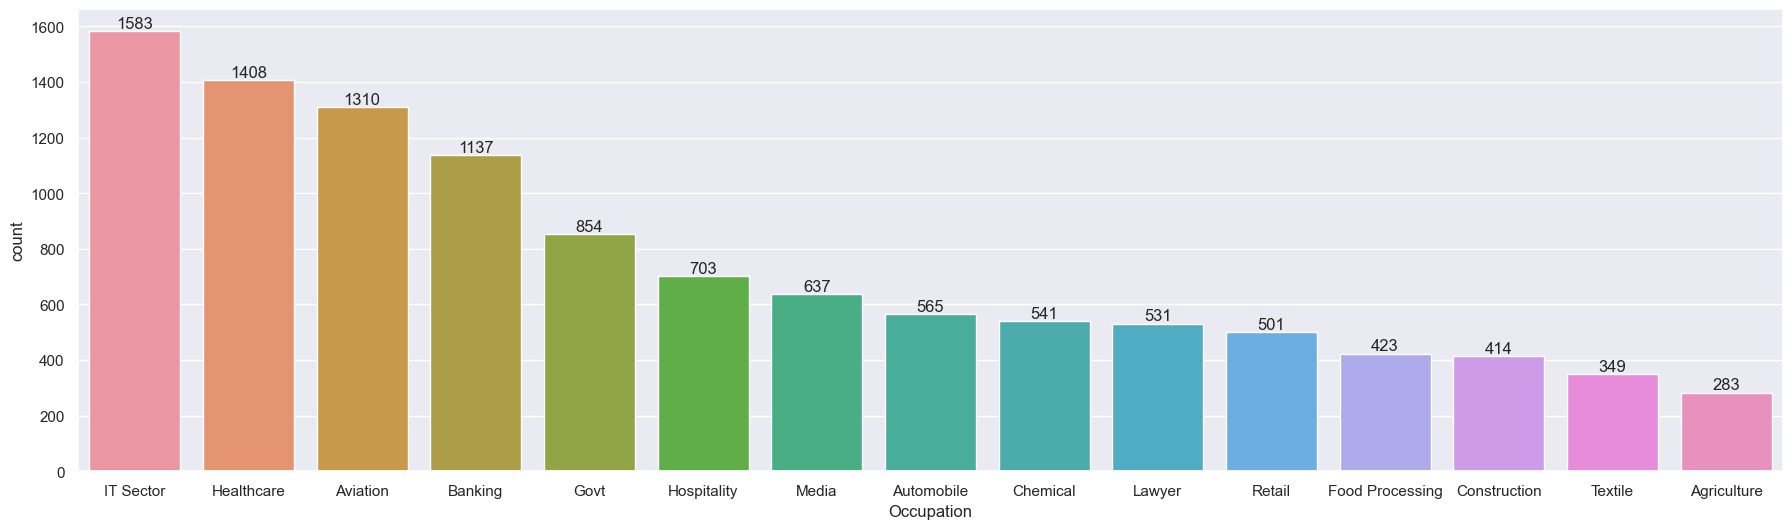

In [24]:
sns.set(rc={'figure.figsize':(22,6)})
occ = sns.countplot(x= 'Occupation', data = df,order = df['Occupation'].value_counts().index)

for bars in occ.containers:
    occ.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

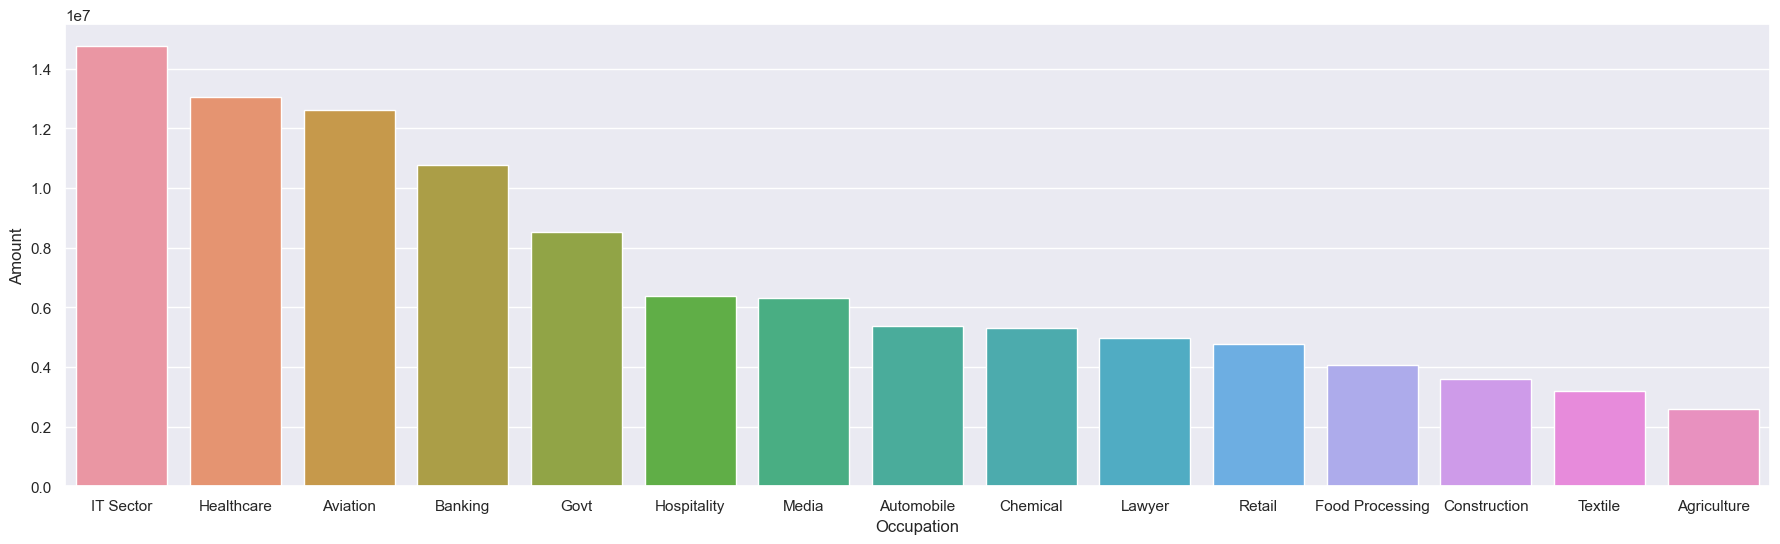

In [25]:
occ_sales = df.groupby(['Occupation'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.barplot(x='Occupation',y='Amount',data = occ_sales)

***From the above graphs we can say that both no. of orders and purchasing power of people working in IT, Healthcare and Aviation is highest.***

# EDA On 'PRODUCT CATEGORY' Column

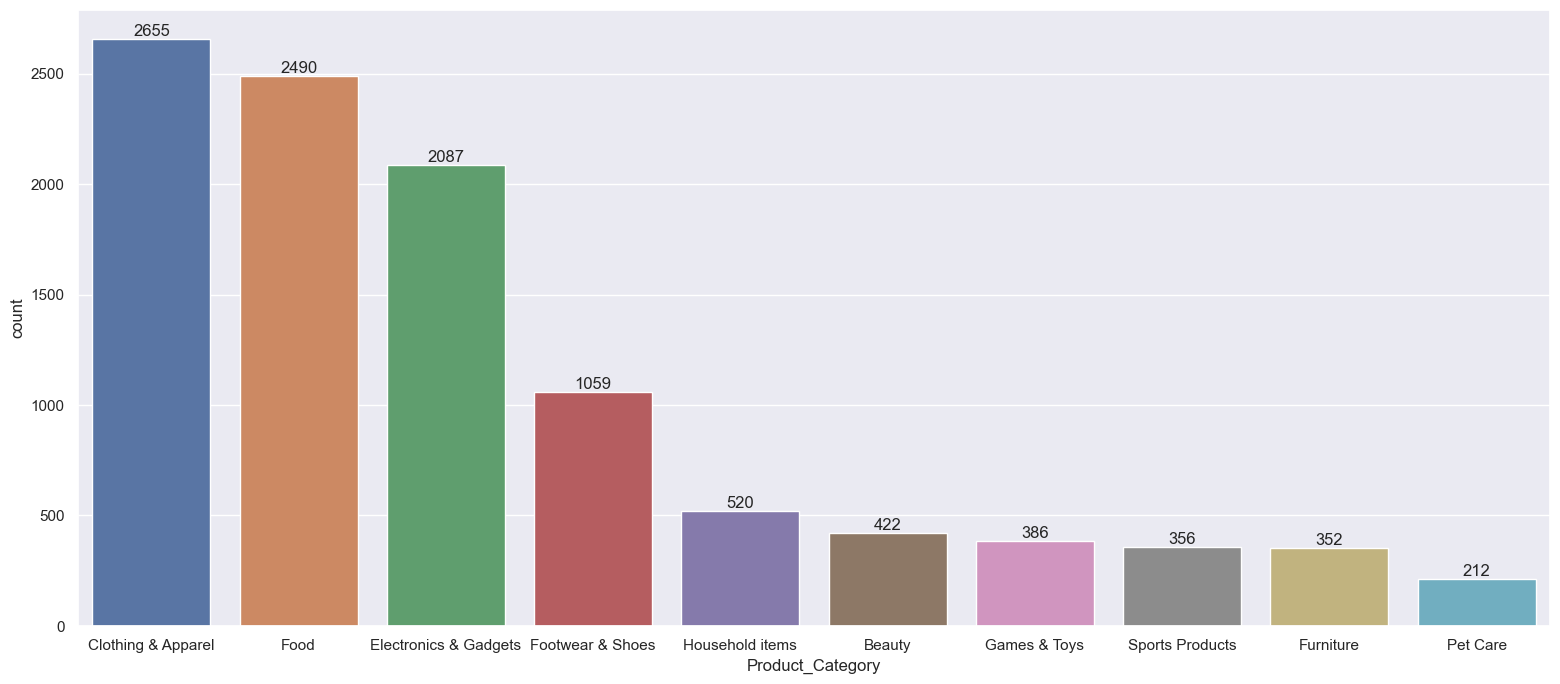

In [26]:
sns.set(rc={'figure.figsize':(19,8)})
pro = sns.countplot(x= 'Product_Category', data = df,order = df['Product_Category'].value_counts().iloc[:10].index)

for bars in pro.containers:
    pro.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

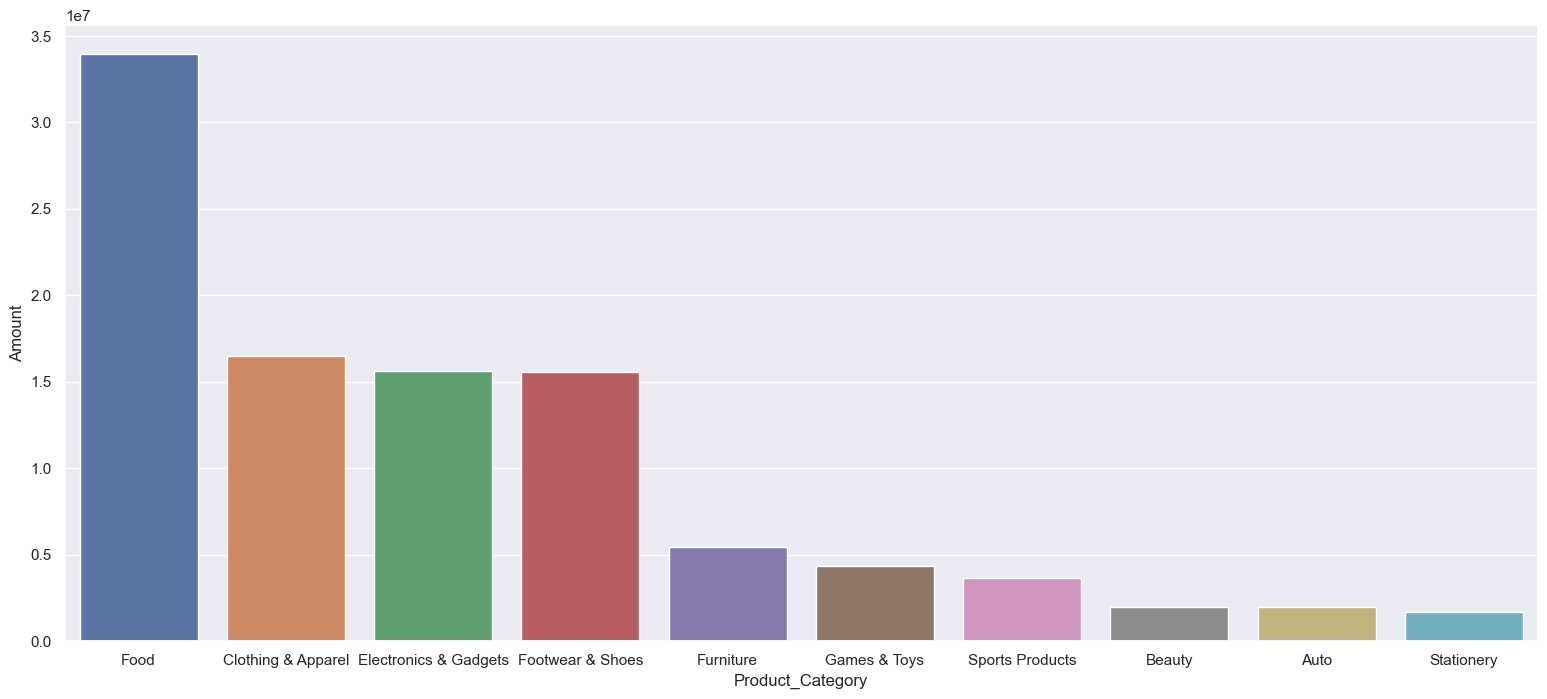

In [27]:
product_sales = df.groupby(['Product_Category'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(10)

sns.barplot(x='Product_Category',y='Amount',data = product_sales)

***From the above graphs we can see that most products sold were of Food, Clothing and electronic categories respectively.***

# KEY INSIGHTS

***1. One strong way of increasing sales is through marketing campaigns that explicitly associate men with a brand. Also by leveraging the opportunity offered by television, social media and search engine adverts that draw a large male audience.***

***2. Different age groups react differently to advertising . Digital marketing can look complex if you’re targeting consumers
   from multiple age groups. The best way to ensure that your brand is reaching people from across generational gaps is by
   adjusting your marketing strategy to target different generations. That is where generational marketing comes in. In
   generational marketing, you create unique marketing strategies for each generational age group.***

***3. Increasing focus on unmarried people as singles are one of the largest, fastest-growing consumer segments as singles are
less likely to be price-conscious while shopping, as they are more willing to try new things.***

***4. one can increase the sales across different states by studying the languages, cultues, demands, likes and dislikes of
      people living there.***

***5. Better understanding about people of different professions will surely improve the figures. Learning their challenges,
    desires, fears and concerns can help you sell a product or service that meets their needs.***